In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

In [2]:
tn_movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [3]:
#making a new df 'Money Metrics'
money_metrics_df = tn_movie_budgets_df

# cleaning budget and gross
# debug this later, but, maybe come back
def clean_a_money_column(df, series_title):
    df[series_title] = df[series_title].str.replace('$','')
    df[series_title] = df[series_title].str.replace(',','')
    df[series_title] = pd.to_numeric(df[series_title])
    return df


money_metrics_df = clean_a_money_column(money_metrics_df,'worldwide_gross')
money_metrics_df = clean_a_money_column(money_metrics_df,'domestic_gross')
money_metrics_df = clean_a_money_column(money_metrics_df,'production_budget')
#clean off dollars
#money_metrics_df['worldwide_gross'] = money_metrics_df['worldwide_gross'].str.replace('$', '')
#clear off commas
#money_metrics_df['worldwide_gross'] = money_metrics_df['worldwide_gross'].str.replace(',', '')
#money_metrics_df.info()

### Repeat for other money columns

#money_metrics_df['production_budget'] = money_metrics_df['production_budget'].str.replace('$', '')
#money_metrics_df['production_budget'] = money_metrics_df['production_budget'].str.replace(',', '')
#money_metrics_df['domestic_gross'] = money_metrics_df['domestic_gross'].str.replace('$', '')
#money_metrics_df['domestic_gross'] = money_metrics_df['domestic_gross'].str.replace(',', '')


#### FUCK YEAH FUNCTIONS

In [4]:
money_metrics_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [5]:
#test that it worked
print(money_metrics_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB
None


In [6]:
#Money metrics from lecture

#Profit Margin (PM): 
#revenue earned minus the cost divided by revenue; profit/revenue
#Return on Investment (ROI): 
#ratio between net profit and cost; net profit/cost

#assuming gross equals revenue, production budget = cost
money_metrics_df['Profit Margin']= (money_metrics_df['worldwide_gross']-money_metrics_df['production_budget'])/money_metrics_df['worldwide_gross']
money_metrics_df['ROI'] = (money_metrics_df['worldwide_gross']/money_metrics_df['production_budget'])

In [7]:
money_metrics_df


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profit Margin,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,0.846921,6.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,0.607331,2.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-1.337036,0.427892
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,0.764364,4.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,0.759251,4.153696
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-inf,0.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,0.975051,40.082500
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-2.736921,0.267600
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-inf,0.000000


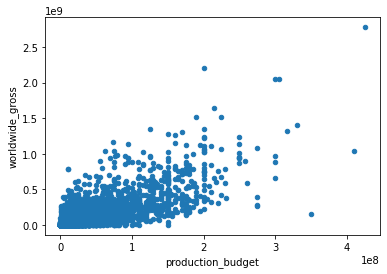

In [8]:
money_metrics_df.plot('production_budget' , 'worldwide_gross',  kind = 'scatter');

#plotting to test

In [9]:
money_metrics_df.sort_values(['Profit Margin'], ascending=False).head(40)
#Looks good!

#setting profit margin desc as order for the table
money_metrics_df=money_metrics_df.sort_values(['Profit Margin'], ascending=False)

In [10]:
money_metrics_df['Year'] = money_metrics_df['release_date']





money_metrics_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profit Margin,ROI,Year
5745,46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,0.999444,1800.000000,"Jun 30, 1972"
5613,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,0.997995,498.750000,"Mar 21, 1980"
5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,0.997683,431.517853,"Sep 25, 2009"
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,0.997599,416.564740,"Jul 10, 2015"
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,0.997584,413.833333,"Jul 14, 1999"
...,...,...,...,...,...,...,...,...,...
5522,23,"Dec 31, 2014",Pancakes,400000,0,0,-inf,0.000000,"Dec 31, 2014"
5521,22,"Nov 4, 2005",Show Me,400000,0,0,-inf,0.000000,"Nov 4, 2005"
5520,21,"Apr 1, 1986",My Beautiful Laundrette,400000,0,0,-inf,0.000000,"Apr 1, 1986"
5116,17,"Sep 8, 2015",Checkmate,1500000,0,0,-inf,0.000000,"Sep 8, 2015"


In [11]:
#Vu's magic lambda, plus to numeric on the year 
money_metrics_df['Year'] = pd.to_numeric(money_metrics_df['release_date'].map(lambda x: x[-4:]))
money_metrics_df['Month'] = money_metrics_df['release_date'].map(lambda x: x[:3])


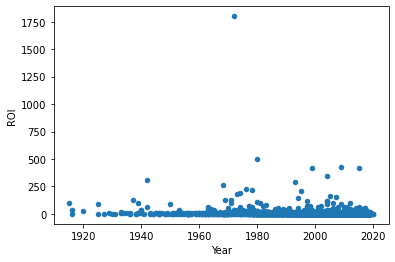

In [12]:
#Let's try year vs. ROI, see if there was a particularly good year to be making movies.
money_metrics_df.plot('Year' , 'ROI',  kind = 'scatter');
#Looks like we've got a lot of outliers here, and a big chunk sitting on the bottom! We may want to graph only the main body of the bell curve here. 

In [13]:
money_metrics_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profit Margin,ROI,Year,Month
5745,46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,0.999444,1800.000000,1972,Jun
5613,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,0.997995,498.750000,1980,Mar
5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,0.997683,431.517853,2009,Sep
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,0.997599,416.564740,2015,Jul
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,0.997584,413.833333,1999,Jul
...,...,...,...,...,...,...,...,...,...,...
5522,23,"Dec 31, 2014",Pancakes,400000,0,0,-inf,0.000000,2014,Dec
5521,22,"Nov 4, 2005",Show Me,400000,0,0,-inf,0.000000,2005,Nov
5520,21,"Apr 1, 1986",My Beautiful Laundrette,400000,0,0,-inf,0.000000,1986,Apr
5116,17,"Sep 8, 2015",Checkmate,1500000,0,0,-inf,0.000000,2015,Sep


In [14]:
#functions to pull years, months out of the data set. Can also be used for other column types?
#for now, use int types for the year
def year_iso (df, year):
    output_df = df[df['Year'] == year]
    return output_df
#for now, with money_metrics_df, use three letter abreviations for months
def month_iso (df, month):
    output_df = df[df['Month'] == month]
    return output_df


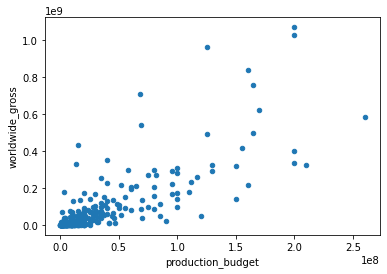

In [15]:
#Test, just grabbing 2010 and plotting it
mmdf_2010 = year_iso(money_metrics_df, 2010)

mmdf_2010.plot('production_budget' , 'worldwide_gross',  kind = 'scatter');



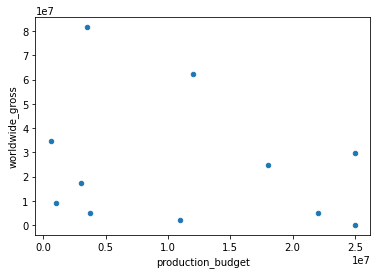

In [16]:
#Now grabbing 1970 for comparison
mmdf_1970 = year_iso(money_metrics_df, 1970)

mmdf_1970.plot('production_budget' , 'worldwide_gross',  kind = 'scatter');

In [17]:
#Automating year pull outs on money_metrics_df, not sure the best way to do this, but for now, list of dataframes?
year_range = list(range(1915,2021))
year_range
year_keys = []
for i in year_range:
    keystring = ''
    keystring = str(i) + ' money_metric_df'
    year_keys.append(keystring)

list_of_dfs_years = []
for i in year_range:
    df_out = year_iso (money_metrics_df, i)
    list_of_dfs_years.append(df_out)
    
years_and_dfs = dict(zip(year_keys,list_of_dfs_years))

years_and_dfs['2019 money_metric_df']
#okay, now we just gotta join things

years_and_dfs.keys()

dict_keys(['1915 money_metric_df', '1916 money_metric_df', '1917 money_metric_df', '1918 money_metric_df', '1919 money_metric_df', '1920 money_metric_df', '1921 money_metric_df', '1922 money_metric_df', '1923 money_metric_df', '1924 money_metric_df', '1925 money_metric_df', '1926 money_metric_df', '1927 money_metric_df', '1928 money_metric_df', '1929 money_metric_df', '1930 money_metric_df', '1931 money_metric_df', '1932 money_metric_df', '1933 money_metric_df', '1934 money_metric_df', '1935 money_metric_df', '1936 money_metric_df', '1937 money_metric_df', '1938 money_metric_df', '1939 money_metric_df', '1940 money_metric_df', '1941 money_metric_df', '1942 money_metric_df', '1943 money_metric_df', '1944 money_metric_df', '1945 money_metric_df', '1946 money_metric_df', '1947 money_metric_df', '1948 money_metric_df', '1949 money_metric_df', '1950 money_metric_df', '1951 money_metric_df', '1952 money_metric_df', '1953 money_metric_df', '1954 money_metric_df', '1955 money_metric_df', '1956

In [18]:
#next goal, make a graph comparing two data sets. 

In [19]:
jan_mmdf = month_iso(money_metrics_df,'Jan')
feb_mmdf = month_iso(money_metrics_df,'Feb')

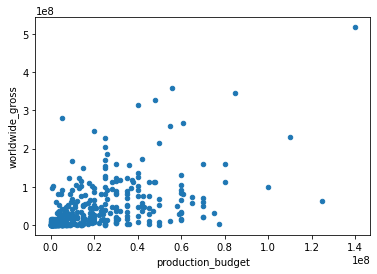

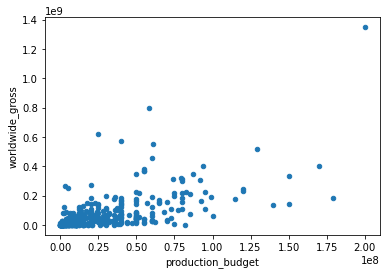

In [20]:
jan_mmdf.plot('production_budget' , 'worldwide_gross',  kind = 'scatter');
feb_mmdf.plot('production_budget' , 'worldwide_gross',  kind = 'scatter');
#To compare months, for example
# 

In [21]:
money_metrics_df.set_index('movie', inplace = True)

In [22]:
money_metrics_df.index.rename('Movie', inplace = True)

In [23]:
money_metrics_df

,id,release_date,production_budget,domestic_gross,worldwide_gross,Profit Margin,ROI,Year,Month
Movie,,,,,,,,,
Deep Throat,46,"Jun 30, 1972",25000,45000000,45000000,0.999444,1800.000000,1972,Jun
Mad Max,14,"Mar 21, 1980",200000,8750000,99750000,0.997995,498.750000,1980,Mar
Paranormal Activity,93,"Sep 25, 2009",450000,107918810,194183034,0.997683,431.517853,2009,Sep
The Gallows,80,"Jul 10, 2015",100000,22764410,41656474,0.997599,416.564740,2015,Jul
The Blair Witch Project,7,"Jul 14, 1999",600000,140539099,248300000,0.997584,413.833333,1999,Jul
...,...,...,...,...,...,...,...,...,...
Pancakes,23,"Dec 31, 2014",400000,0,0,-inf,0.000000,2014,Dec
Show Me,22,"Nov 4, 2005",400000,0,0,-inf,0.000000,2005,Nov
My Beautiful Laundrette,21,"Apr 1, 1986",400000,0,0,-inf,0.000000,1986,Apr


In [72]:
#vu's dupe check
#
movie_dupes = pd.Series(tn_movie_budgets_df['movie'].value_counts())
title_dupes = [movie_dupes.index[index] for index in list(range(len(movie_dupes))) if movie_dupes.values[index] > 1]
print(len(title_dupes))
print(movie_dupes[0:len(title_dupes)].sum())

#making a new df to do the rename in
title_dupes
title_dupes_df = money_metrics_df[money_metrics_df.index.isin(title_dupes)]

81
165


In [73]:
#reset the index for easier editing
title_dupes_df.reset_index(inplace = True)
title_dupes_df

,Movie,id,release_date,production_budget,domestic_gross,worldwide_gross,Profit Margin,ROI,Year,Month
0,Night of the Living Dead,77,"Oct 1, 1968",114000,12087064,30087064,0.996211,263.921614,1968,Oct
1,Halloween,37,"Oct 17, 1978",325000,47000000,70000000,0.995357,215.384615,1978,Oct
2,The Texas Chainsaw Massacre,66,"Oct 18, 1974",140000,26572439,26572439,0.994731,189.803136,1974,Oct
3,Friday the 13th,25,"May 9, 1980",550000,39754601,59754601,0.990796,108.644729,1980,May
4,The Birth of a Nation,78,"Feb 8, 1915",110000,10000000,11000000,0.990000,100.000000,1915,Feb
...,...,...,...,...,...,...,...,...,...,...
160,Trance,31,"Dec 31, 2012",950000,0,0,-inf,0.000000,2012,Dec
161,Day of the Dead,52,"Apr 8, 2008",18000000,0,0,-inf,0.000000,2008,Apr
162,Snitch,52,"Dec 31, 2012",850000,0,0,-inf,0.000000,2012,Dec
163,Crossroads,86,"Jun 23, 2015",500000,0,0,-inf,0.000000,2015,Jun


In [74]:
title_dupes_df['Yearasastring'] = title_dupes_df['Year'].map(lambda x: str(x))

title_dupes_df['New Title'] = title_dupes_df['Movie']+' '+title_dupes_df['Yearasastring']

title_dupes_df['Movie'] = title_dupes_df['New Title'].map(lambda x: str(x))


<ipython-input-74-37f4a2a9495e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_dupes_df['Yearasastring'] = title_dupes_df['Year'].map(lambda x: str(x))
<ipython-input-74-37f4a2a9495e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_dupes_df['New Title'] = title_dupes_df['Movie']+' '+title_dupes_df['Yearasastring']
<ipython-input-74-37f4a2a9495e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [91]:
title_dupes_df.drop(columns= ['Yearasastring','New Title'],axis = 1)

,Movie,id,release_date,production_budget,domestic_gross,worldwide_gross,Profit Margin,ROI,Year,Month
0,Night of the Living Dead 1968,77,"Oct 1, 1968",114000,12087064,30087064,0.996211,263.921614,1968,Oct
1,Halloween 1978,37,"Oct 17, 1978",325000,47000000,70000000,0.995357,215.384615,1978,Oct
2,The Texas Chainsaw Massacre 1974,66,"Oct 18, 1974",140000,26572439,26572439,0.994731,189.803136,1974,Oct
3,Friday the 13th 1980,25,"May 9, 1980",550000,39754601,59754601,0.990796,108.644729,1980,May
4,The Birth of a Nation 1915,78,"Feb 8, 1915",110000,10000000,11000000,0.990000,100.000000,1915,Feb
...,...,...,...,...,...,...,...,...,...,...
160,Trance 2012,31,"Dec 31, 2012",950000,0,0,-inf,0.000000,2012,Dec
161,Day of the Dead 2008,52,"Apr 8, 2008",18000000,0,0,-inf,0.000000,2008,Apr
162,Snitch 2012,52,"Dec 31, 2012",850000,0,0,-inf,0.000000,2012,Dec
163,Crossroads 2015,86,"Jun 23, 2015",500000,0,0,-inf,0.000000,2015,Jun


In [90]:
title_dupes_df


,Movie,id,release_date,production_budget,domestic_gross,worldwide_gross,Profit Margin,ROI,Year,Month,Yearasastring,New Title
0,Night of the Living Dead 1968,77,"Oct 1, 1968",114000,12087064,30087064,0.996211,263.921614,1968,Oct,1968,Night of the Living Dead 1968
1,Halloween 1978,37,"Oct 17, 1978",325000,47000000,70000000,0.995357,215.384615,1978,Oct,1978,Halloween 1978
2,The Texas Chainsaw Massacre 1974,66,"Oct 18, 1974",140000,26572439,26572439,0.994731,189.803136,1974,Oct,1974,The Texas Chainsaw Massacre 1974
3,Friday the 13th 1980,25,"May 9, 1980",550000,39754601,59754601,0.990796,108.644729,1980,May,1980,Friday the 13th 1980
4,The Birth of a Nation 1915,78,"Feb 8, 1915",110000,10000000,11000000,0.990000,100.000000,1915,Feb,1915,The Birth of a Nation 1915
...,...,...,...,...,...,...,...,...,...,...,...,...
160,Trance 2012,31,"Dec 31, 2012",950000,0,0,-inf,0.000000,2012,Dec,2012,Trance 2012
161,Day of the Dead 2008,52,"Apr 8, 2008",18000000,0,0,-inf,0.000000,2008,Apr,2008,Day of the Dead 2008
162,Snitch 2012,52,"Dec 31, 2012",850000,0,0,-inf,0.000000,2012,Dec,2012,Snitch 2012
163,Crossroads 2015,86,"Jun 23, 2015",500000,0,0,-inf,0.000000,2015,Jun,2015,Crossroads 2015


KeyError: "['Night of the Living Dead Oct 1, 1968' 'Halloween Oct 17, 1978'\n 'The Texas Chainsaw Massacre Oct 18, 1974' 'Friday the 13th May 9, 1980'\n 'The Birth of a Nation Feb 8, 1915' 'Cinderella Feb 15, 1950'\n 'Home Apr 23, 2009' 'Cat People Nov 16, 1942'\n '20,000 Leagues Under the Sea Dec 24, 1916' 'Pinocchio Feb 9, 1940'\n 'Dawn of the Dead Apr 20, 1979' 'House of Wax Apr 10, 1953'\n 'The Last House on the Left Aug 30, 1972'\n 'Beauty and the Beast Nov 13, 1991' 'Halloween Oct 19, 2018'\n 'Peter Pan Feb 5, 1953' 'The Fog Feb 1, 1980' 'Aladdin Nov 11, 1992'\n 'The Omen Jun 25, 1976' 'Teenage Mutant Ninja Turtles Mar 30, 1990'\n 'King Kong Apr 7, 1933' 'Carrie Nov 16, 1976'\n 'A Nightmare on Elm Street Nov 9, 1984' 'Crash May 6, 2005'\n 'Notorious Aug 15, 1946' 'The Texas Chainsaw Massacre Oct 17, 2003'\n 'The Gift Aug 7, 2015' 'Poltergeist Jun 4, 1982'\n 'The Karate Kid Jun 22, 1984' 'Twilight Nov 21, 2008'\n 'Ghostbusters Jun 8, 1984' 'Footloose Feb 17, 1984'\n 'Day of the Dead Jun 30, 1985' 'The Karate Kid Jun 11, 2010'\n 'The Signal Feb 22, 2008' 'Beauty and the Beast Mar 17, 2017'\n 'Venom Oct 5, 2018' 'Around the World in 80 Days Oct 17, 1956'\n 'The Avengers May 4, 2012' 'The Ten Commandments Oct 5, 1956'\n 'Casino Royale Nov 17, 2006' 'Planet of the Apes Feb 8, 1968'\n '20,000 Leagues Under the Sea Dec 23, 1954' 'Cinderella Mar 13, 2015'\n 'The Jungle Book Apr 15, 2016' 'Friday the 13th Feb 13, 2009'\n 'Pet Sematary Apr 5, 2019' 'The Mummy May 7, 1999'\n 'Halloween Aug 31, 2007' 'Alice in Wonderland Mar 5, 2010'\n 'Pet Sematary Apr 21, 1989' 'Ben-Hur Nov 18, 1959' 'The Omen Jun 6, 2006'\n 'Crossroads Feb 15, 2002' 'Lolita Jun 13, 1962' 'The Gift Dec 19, 2000'\n 'RoboCop Jul 17, 1987' 'Total Recall Jun 1, 1990'\n 'Conan the Barbarian May 14, 1982' 'Clash of the Titans Apr 1, 2010'\n 'King Kong Dec 17, 1976' 'Teenage Mutant Ninja Turtles Aug 8, 2014'\n 'Snitch Feb 22, 2013' 'Fantastic Four Jul 8, 2005'\n 'The Great Gatsby Mar 29, 1974' 'Dawn of the Dead Mar 19, 2004'\n 'Planet of the Apes Jul 27, 2001' 'Peteâ\\x80\\x99s Dragon Nov 3, 1977'\n 'Hercules Jun 13, 1997' 'Point Break Jul 12, 1991'\n 'Casino Royale Apr 28, 1967' 'Unknown Feb 18, 2011'\n 'Aladdin May 24, 2019' 'A Nightmare on Elm Street Apr 30, 2010'\n 'Godzilla May 16, 2014' 'The Last House on the Left Mar 13, 2009'\n 'The Day the Earth Stood Still Sep 18, 1951' 'Godzilla May 19, 1998'\n 'Home Mar 27, 2015' 'The Day the Earth Stood Still Dec 12, 2008'\n 'Clash of the Titans Jun 12, 1981' 'Carrie Oct 18, 2013'\n 'Poltergeist May 22, 2015' 'King Kong Dec 14, 2005'\n 'Footloose Oct 14, 2011' 'Dangerous Liaisons Dec 21, 1988'\n 'Hercules Jul 25, 2014' 'Notorious Jan 16, 2009'\n 'Flatliners Aug 10, 1990' 'Death at a Funeral Aug 17, 2007'\n 'Death at a Funeral Apr 16, 2010' 'Flatliners Sep 29, 2017'\n 'Side Effects Feb 8, 2013' 'Peteâ\\x80\\x99s Dragon Aug 12, 2016'\n 'The Mummy Jun 9, 2017' 'The Fog Oct 14, 2005' 'RoboCop Feb 12, 2014'\n 'Shaft Jun 16, 2000' 'House of Wax May 6, 2005'\n 'The Great Gatsby May 10, 2013' 'Life Mar 24, 2017'\n 'Brothers Dec 4, 2009' 'Legend Nov 20, 2015' 'Total Recall Aug 3, 2012'\n 'The Birth of a Nation Oct 7, 2016' 'Cat People Apr 2, 1982'\n 'Hellboy Apr 2, 2004' 'The Jungle Book Dec 25, 1994'\n 'Ghostbusters Jul 15, 2016' 'The Gambler Dec 10, 2014'\n 'Robin Hood May 14, 2010' 'Trance Apr 5, 2013'\n 'Fantastic Four Aug 7, 2015' 'Night of the Living Dead Oct 19, 1990'\n 'Brothers Aug 14, 2015' 'The Island Jul 22, 2005'\n 'Unforgettable Apr 21, 2017' 'Left Behind Oct 3, 2014'\n 'Point Break Dec 25, 2015' 'Hamlet May 12, 2000' 'Serenity Sep 30, 2005'\n 'Life Apr 16, 1999' 'Ben-Hur Aug 19, 2016' 'Peter Pan Dec 25, 2003'\n 'Legend Apr 18, 1986' 'Unknown Nov 3, 2006' 'Ca$h Dec 31, 2008'\n 'Robin Hood Nov 21, 2018' 'Heist Nov 9, 2001' 'Hellboy Apr 12, 2019'\n 'The Avengers Aug 14, 1998' 'Twilight Mar 6, 1998'\n 'The Island Jun 13, 1980' 'Pinocchio Dec 25, 2002'\n 'Conan the Barbarian Aug 19, 2011' 'The Signal Jun 13, 2014'\n 'The Alamo Oct 24, 1960' 'Around the World in 80 Days Jun 16, 2004'\n 'The Love Letter May 21, 1999' 'Serenity Jan 25, 2019'\n 'Dangerous Liaisons Nov 9, 2012' 'Hamlet Dec 25, 1996'\n 'The Square Apr 9, 2010' 'Heist Nov 13, 2015' 'Crash Oct 4, 1996'\n 'The Alamo Apr 9, 2004' 'Left Behind Feb 2, 2001'\n 'Side Effects Sep 9, 2005' 'The Calling Mar 1, 2002'\n 'Unforgettable Feb 23, 1996' 'The Square Oct 25, 2013'\n 'The Ten Commandments Oct 19, 2007' 'Venom Sep 16, 2005'\n 'The Gambler Aug 4, 1999' 'Lolita Jul 22, 1998' 'Shaft Jun 14, 2019'\n 'Ca$h Mar 26, 2010' 'The Love Letter Aug 18, 2015' 'Home Jun 5, 2009'\n 'The Calling Dec 31, 2009' 'Trance Dec 31, 2012'\n 'Day of the Dead Apr 8, 2008' 'Snitch Dec 31, 2012'\n 'Crossroads Jun 23, 2015' 'Alice in Wonderland Jul 28, 1951'] not found in axis"

In [ ]:
#combining with Vu's genre dataframe
genres_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
genres_df.dropna(axis=0, subset=['genres'], inplace=True)
genres_df['genres'] = genres_df['genres'].map(lambda x: x.split(','))
genres_df.set_index('primary_title', inplace=True)
genres_df.start_year.rename('Year') 
genres_df.index.rename('Movie', inplace = True)

#normalizing index on title



mm_and_genre_df = money_metrics_df.join(genres_df, on = ['Movie', 'Year'], how='inner')
mm_and_genre_df 

In [ ]:
genres_df.index.rename('Movie', inplace = True)

In [ ]:
mm_and_genre_df.index.rename('Movie', inplace = True)

In [ ]:
lost_mmdf = money_metrics_df[~money_metrics_df.index.isin(mm_and_genre_df.index)]
lost_genres = genres_df[~genres_df.index.isin(mm_and_genre_df.index)]

In [ ]:
lost_genres.sort_values(by = 'Movie')

In [ ]:
lost_mmdf.sort_values(by = 'Movie')